### Tarea 1: Cuando hubo más gente en cuarentena desde marzo del 2020 por región?
- Nombre: Pía San Martín Correa
- Docente: Leo Ferres
- Fecha: Martes 12 octubre 2021 

Su tarea es mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día) y contestar las siguientes 2 preguntas: 1) qué dia hubo la mayor cantidad de personas en cuarentena en cada región, y 2) qué día hubo la mayor cantidad de personas en cuarentena en el país?

*Cabe destacar que este trabajo fue generado y construido en base a varios sitios webs, las clases del profesor Leo ferres, las bases de datos del github del min ciencias y con mi compañero Julián Zúñiga Errázuriz*.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
#Importo las librerias que necesitare para la tarea 

In [25]:
quarantine1 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv', sep=',')
# leo datos y separo los datos luego de cada coma
quarantine2 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv', sep=',')
# leo datos y separo los datos luego de cada coma

In [27]:
quarantine2.drop(['Region','Codigo region','Comuna'], axis=1, inplace=True)
quarantine1.drop(['Detalle','Estado', 'Superficie en m2','Perímetro en m','Alcance'], axis=1, inplace=True)
# Elimino los datos que no me entregan información relevante para el estudio

In [28]:
quarantine2 = quarantine2.dropna()
quarantine1 = quarantine1.dropna()
#Elimino los datos NA de los dos dataset 

In [29]:
quarantine2['Codigo comuna'].astype(int)
#En relacion al segundo dataset que fue importado, la variable "codigo comuna" cambio esta variable como entero

0      15101
1      15102
2      15202
3      15201
5       1107
       ...  
356    12101
357    12103
358    12104
359    12303
360    12402
Name: Codigo comuna, Length: 346, dtype: int64

In [30]:
quarantine1.head()
#Analizo los nombres de las variables del primer dataset de cuarentenas

,ID,Nombre,Fecha de Inicio,Fecha de Término,Código CUT Comuna,Region,n_REGION
0,1,Arica,2020-04-16 22:00:00,2020-05-15 22:00:00,15101,15,R15
1,2,Santiago Norte,2020-04-13 05:00:00,2020-05-05 22:00:00,13101,13,R13
2,3,Puente Alto Poniente,2020-04-09 22:00:00,2020-05-08 22:00:00,13201,13,R13
3,4,El Bosque,2020-04-16 22:00:00,2020-09-21 05:00:00,13105,13,R13
4,5,San Bernardo Nororiente,2020-04-16 22:00:00,2020-05-08 22:00:00,13401,13,R13


In [31]:
quarantine2.head()
#Analizo los nombres de las variables del segundo dataset de cuarentenas

,Codigo comuna,Poblacion
0,15101.0,247552.0
1,15102.0,1233.0
2,15202.0,810.0
3,15201.0,2515.0
5,1107.0,129999.0


In [32]:
quarantine1.info()
#Analizo la informacion de las variables del primer dataset
#Fecha de termino y fecha de inicio deben estar en formato date por lo que deben cambiarse con una funcion 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 187 non-null    int64 
 1   Nombre             187 non-null    object
 2   Fecha de Inicio    187 non-null    object
 3   Fecha de Término   187 non-null    object
 4   Código CUT Comuna  187 non-null    int64 
 5   Region             187 non-null    int64 
 6   n_REGION           187 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.7+ KB


In [33]:
quarantine1['Comienzo_Cuarentena'] = pd.to_datetime(quarantine1['Fecha de Inicio'], format='%Y/%m/%d')
quarantine1['Fin_Cuarentena'] = pd.to_datetime(quarantine1['Fecha de Término'], format='%Y/%m/%d')
#Como se pudo evidenciar en el anterior, realizo este paso para cambiar las variables fecha inicio y fecha termino como datetime para que estas puedan ser manejadas 
#Ademas cambio el nombre de estas variables a comienzo_cuarentena y fin_cuarentena

In [34]:
quarantine1=quarantine1.rename(columns={"Código CUT Comuna":"Codigo comuna"})
quarantine1 = quarantine1.merge(quarantine2, on="Codigo comuna", how="left")
#Para poder unificar los dataset, encuentro una variable en comun entre ambos, en este caso la variable
#que ambos coinciden es el codigo de las comunas por lo que primero ambas variables deben tener
#mismo nombre y luego con "merge" mezclo ambos dataset

In [36]:
drange=pd.date_range(quarantine1.Comienzo_Cuarentena.min(),quarantine1.Fin_Cuarentena.max()) 
#Determino una fecha "drange" la cual determinar cual es el "piso" o mino del intervalo y cual es el maximo o techo del intervalo

In [168]:
quarantines = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return quarantine1[(quarantine1['Comienzo_Cuarentena'] <= d) & 
            (quarantine1['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantines[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantines
#En base a la variable creada en el inciso anterior "drange", creo un nuevo dataset
#que incluya las columnas "DATE"
#Además crear una función "suma_poblacion" , esta funcion logra sumar los valores 
#si es la fecha en la que se esta es mayor a la que el dia que empezó la cuarentena, y además es menor a la fecha de termino o "fin_cuarentena"
#y que retorne la cantidad 

#Cabe destacar que esta información fue recaudada por el sitio: 
#https://stackoverflow.com/questions/48103845/python-pandas-sum-values-in-columns-if-date-between-2-dates

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,572.0
1,2020-03-13 21:00:00,572.0
2,2020-03-14 21:00:00,572.0
3,2020-03-15 21:00:00,572.0
4,2020-03-16 21:00:00,572.0
...,...,...
284,2020-12-21 21:00:00,760453.0
285,2020-12-22 21:00:00,760453.0
286,2020-12-23 21:00:00,450658.0
287,2020-12-24 21:00:00,450658.0


### ¿Qué día hubo la mayor cantidad de personas en cuarentena en el país?

### República de Chile 

In [41]:
quarantines[quarantines.Suma_poblacion == quarantines.Suma_poblacion.max()]
#En relacion al dataset quarantines, variables suma_poblacion entrega el valor en el cual fue el día
#que más hubo gente confinada en todo Chile, en este caso, se desprende que el día 15 de julio
# 10.826.730 millones de personas estaban en cuarentenas alrededor de todo Chile.


,DATE,Suma_poblacion
125,2020-07-15 21:00:00,10826730.0
126,2020-07-16 21:00:00,10826730.0
127,2020-07-17 21:00:00,10826730.0
128,2020-07-18 21:00:00,10826730.0
129,2020-07-19 21:00:00,10826730.0
130,2020-07-20 21:00:00,10826730.0
131,2020-07-21 21:00:00,10826730.0
132,2020-07-22 21:00:00,10826730.0
133,2020-07-23 21:00:00,10826730.0
134,2020-07-24 21:00:00,10826730.0


Text(0.5, 1.0, 'QUARANTINES IN CHILE')

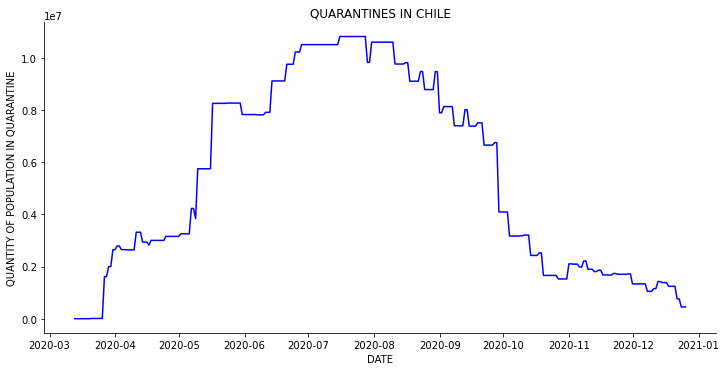

In [190]:
sns.relplot(data = quarantines, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="b",
            kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN CHILE')
#Con sns relplot se denota de forma gráfica las cuarentenas en Chile y la cantidad de personas 
#Confinadas desde marzo del 2020 hasta diciembre del 2020, tal como se pronuncio en el punto anterior
#se ve claramente que el 15 de julio fue el día en que más gente estuvo en cuarentena en todo Chile

### A continuación se presenta el analisis de cuarentenas por región:

### l Región: Tarapacá

In [171]:
Región_de_Tarapaca = quarantine1[quarantine1['Region'] == 1]
quarantine_R1 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Tarapaca[(Región_de_Tarapaca['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Tarapaca['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R1[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)

#Region de Tarapaca se observa que la mayor cantidad de poblacion en cuarentena fue 370.857
#https://stackoverflow.com/questions/48103845/python-pandas-sum-values-in-columns-if-date-between-2-dates


In [170]:
quarantine_R1[quarantine_R1.Suma_poblacion == quarantine_R1.Suma_poblacion.max()]

,DATE,Suma_poblacion
93,2020-06-13 21:00:00,370857.0
94,2020-06-14 21:00:00,370857.0
95,2020-06-15 21:00:00,370857.0
96,2020-06-16 21:00:00,370857.0
97,2020-06-17 21:00:00,370857.0
...,...,...
195,2020-09-23 21:00:00,370857.0
196,2020-09-24 21:00:00,370857.0
197,2020-09-25 21:00:00,370857.0
198,2020-09-26 21:00:00,370857.0


Text(0.5, 1.0, 'QUARANTINES IN TARAPACÁ')

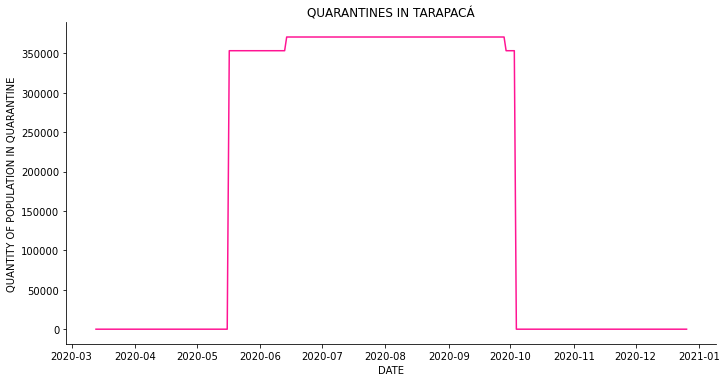

In [188]:
sns.relplot(data = quarantine_R1, x = "DATE", y ='Suma_poblacion', zorder=0, color="deeppink", height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN TARAPACÁ')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de tarapaca, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### ll Región: Antofagasta

In [111]:
Región_de_Antofagasta = quarantine1[quarantine1['Region'] == 2]
quarantine_R2 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Antofagasta[(Región_de_Antofagasta['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Antofagasta['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R2[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)


In [109]:
quarantine_R2[quarantine_R2.Suma_poblacion == quarantine_R2.Suma_poblacion.max()]

,DATE,Suma_poblacion
104,2020-06-24 21:00:00,658916.0
105,2020-06-25 21:00:00,658916.0
106,2020-06-26 21:00:00,658916.0
107,2020-06-27 21:00:00,658916.0
108,2020-06-28 21:00:00,658916.0
109,2020-06-29 21:00:00,658916.0
110,2020-06-30 21:00:00,658916.0
111,2020-07-01 21:00:00,658916.0
112,2020-07-02 21:00:00,658916.0
113,2020-07-03 21:00:00,658916.0


Text(0.5, 1.0, 'QUARANTINES IN ANTOFAGASTA')

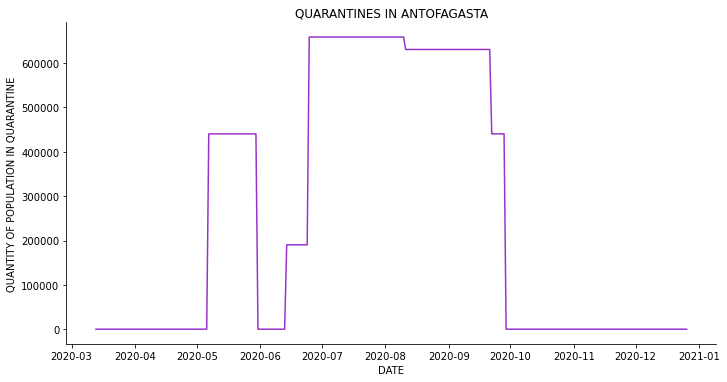

In [191]:
sns.relplot(data = quarantine_R2, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="darkorchid", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN ANTOFAGASTA')

### lll Región: Atacama

In [118]:
Región_de_Atacama = quarantine1[quarantine1['Region'] == 3]
quarantine_R3 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Atacama[(Región_de_Atacama['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Atacama['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R3[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R3

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [119]:
quarantine_R3[quarantine_R3.Suma_poblacion == quarantine_R3.Suma_poblacion.max()]

,DATE,Suma_poblacion
184,2020-09-12 21:00:00,243087.0
185,2020-09-13 21:00:00,243087.0
186,2020-09-14 21:00:00,243087.0
187,2020-09-15 21:00:00,243087.0
188,2020-09-16 21:00:00,243087.0
189,2020-09-17 21:00:00,243087.0
190,2020-09-18 21:00:00,243087.0
191,2020-09-19 21:00:00,243087.0
192,2020-09-20 21:00:00,243087.0
193,2020-09-21 21:00:00,243087.0


Text(0.5, 1.0, 'QUARANTINES IN ATACAMA')

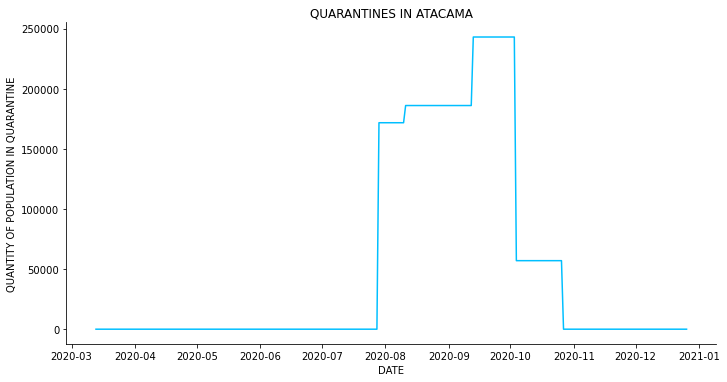

In [192]:
sns.relplot(data = quarantine_R3, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="deepskyblue", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN ATACAMA')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de atacana, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### lV Región: Coquimbo 

In [121]:
Región_de_Coquimbo = quarantine1[quarantine1['Region'] == 4]
quarantine_R4 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Coquimbo[(Región_de_Coquimbo['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Coquimbo['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R4[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R4

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [122]:
quarantine_R4[quarantine_R4.Suma_poblacion == quarantine_R4.Suma_poblacion.max()]

,DATE,Suma_poblacion
163,2020-08-22 21:00:00,627660.0
164,2020-08-23 21:00:00,627660.0
165,2020-08-24 21:00:00,627660.0
166,2020-08-25 21:00:00,627660.0
167,2020-08-26 21:00:00,627660.0
168,2020-08-27 21:00:00,627660.0
169,2020-08-28 21:00:00,627660.0
170,2020-08-29 21:00:00,627660.0
171,2020-08-30 21:00:00,627660.0
172,2020-08-31 21:00:00,627660.0


Text(0.5, 1.0, 'QUARANTINES IN COQUIMBO')

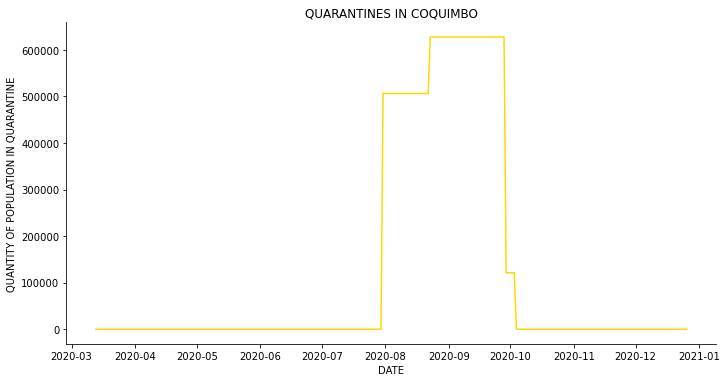

In [193]:
sns.relplot(data = quarantine_R4, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="gold", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN COQUIMBO')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Coquimbo, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### V Región: Valparaíso 

In [125]:
Región_de_Valparaiso = quarantine1[quarantine1['Region'] == 5]
quarantine_R5 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Valparaiso[(Región_de_Valparaiso['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Valparaiso['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R5[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R5

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [126]:
quarantine_R5[quarantine_R5.Suma_poblacion == quarantine_R5.Suma_poblacion.max()]

,DATE,Suma_poblacion
107,2020-06-27 21:00:00,1023023.0
108,2020-06-28 21:00:00,1023023.0
109,2020-06-29 21:00:00,1023023.0
110,2020-06-30 21:00:00,1023023.0
111,2020-07-01 21:00:00,1023023.0
112,2020-07-02 21:00:00,1023023.0
113,2020-07-03 21:00:00,1023023.0
114,2020-07-04 21:00:00,1023023.0
115,2020-07-05 21:00:00,1023023.0
116,2020-07-06 21:00:00,1023023.0


Text(0.5, 1.0, 'QUARANTINES IN VALPARAÍSO')

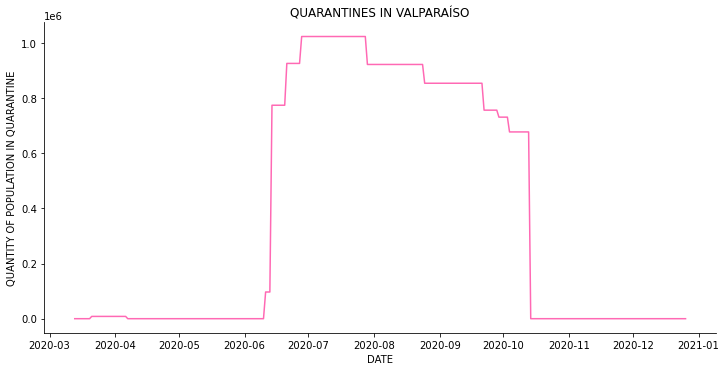

In [194]:
sns.relplot(data = quarantine_R5, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="hotpink", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN VALPARAÍSO')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de VALPARAISO, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Vl Región: O’Higgins

In [129]:
Región_de_Ohiggins = quarantine1[quarantine1['Region'] == 6]
quarantine_R6 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Ohiggins[(Región_de_Ohiggins['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Ohiggins['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R6[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R6

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [130]:
quarantine_R6[quarantine_R6.Suma_poblacion == quarantine_R6.Suma_poblacion.max()]

,DATE,Suma_poblacion
125,2020-07-15 21:00:00,425338.0
126,2020-07-16 21:00:00,425338.0
127,2020-07-17 21:00:00,425338.0
128,2020-07-18 21:00:00,425338.0
129,2020-07-19 21:00:00,425338.0
130,2020-07-20 21:00:00,425338.0
131,2020-07-21 21:00:00,425338.0
132,2020-07-22 21:00:00,425338.0
133,2020-07-23 21:00:00,425338.0
134,2020-07-24 21:00:00,425338.0


Text(0.5, 1.0, 'QUARANTINES IN O’HIGGINS')

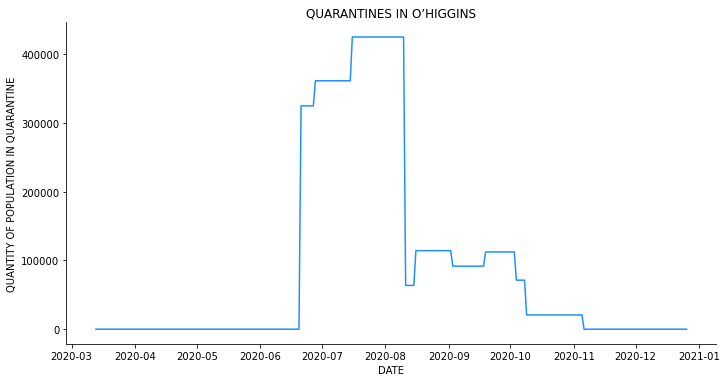

In [195]:
sns.relplot(data = quarantine_R6, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="dodgerblue", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN O’HIGGINS')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de OHIGGINS, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Vll Región: Maule

In [132]:
Región_de_Maule = quarantine1[quarantine1['Region'] == 7]
quarantine_R7 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Maule[(Región_de_Maule['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Maule['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R7[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R7

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [133]:
quarantine_R7[quarantine_R7.Suma_poblacion == quarantine_R7.Suma_poblacion.max()]

,DATE,Suma_poblacion
190,2020-09-18 21:00:00,236964.0
191,2020-09-19 21:00:00,236964.0
192,2020-09-20 21:00:00,236964.0
193,2020-09-21 21:00:00,236964.0
194,2020-09-22 21:00:00,236964.0
195,2020-09-23 21:00:00,236964.0
196,2020-09-24 21:00:00,236964.0
197,2020-09-25 21:00:00,236964.0
198,2020-09-26 21:00:00,236964.0
199,2020-09-27 21:00:00,236964.0


Text(0.5, 1.0, 'QUARANTINES IN MAULE')

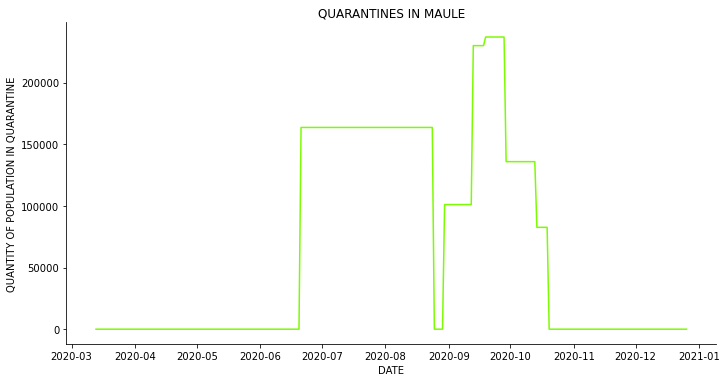

In [196]:
sns.relplot(data = quarantine_R7, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="lawngreen", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN MAULE')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Maule, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Vlll Región: Biobío

In [136]:
Región_de_Biobio = quarantine1[quarantine1['Region'] == 8]
quarantine_R8 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Biobio[(Región_de_Biobio['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Biobio['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R8[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R8

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,328089.0
285,2020-12-22 21:00:00,328089.0
286,2020-12-23 21:00:00,328089.0
287,2020-12-24 21:00:00,328089.0


In [137]:
quarantine_R8[quarantine_R8.Suma_poblacion == quarantine_R8.Suma_poblacion.max()]

,DATE,Suma_poblacion
219,2020-10-17 21:00:00,1131488.0
220,2020-10-18 21:00:00,1131488.0


Text(0.5, 1.0, 'QUARANTINES IN BÍOBIO')

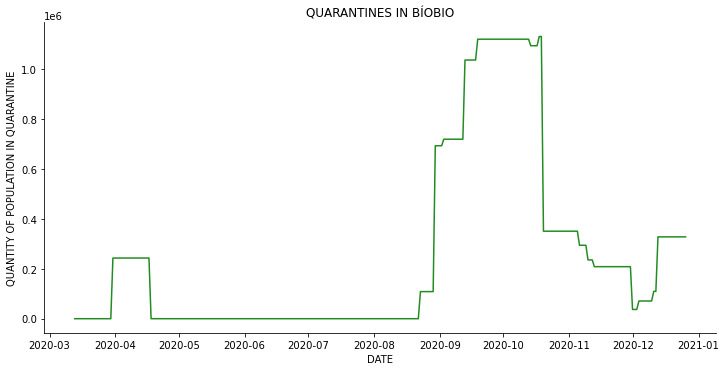

In [197]:
sns.relplot(data = quarantine_R8, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="forestgreen", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN BÍOBIO')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Biobio, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### lX Región: Araucanía 

In [139]:
Región_de_Araucania = quarantine1[quarantine1['Region'] == 9]
quarantine_R9 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Araucania[(Región_de_Araucania['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Araucania['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R9[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R9

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,124464.0
285,2020-12-22 21:00:00,124464.0
286,2020-12-23 21:00:00,96804.0
287,2020-12-24 21:00:00,96804.0


In [140]:
quarantine_R9[quarantine_R9.Suma_poblacion == quarantine_R9.Suma_poblacion.max()]

,DATE,Suma_poblacion
247,2020-11-14 21:00:00,610876.0
248,2020-11-15 21:00:00,610876.0


Text(0.5, 1.0, 'QUARANTINES IN ARAUCANÍA')

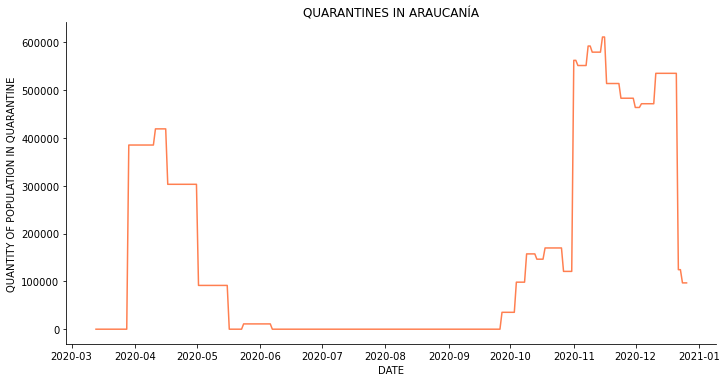

In [198]:
sns.relplot(data = quarantine_R9, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="coral", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN ARAUCANÍA')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Araucania, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### X Región: Los lagos

In [142]:
Región_de_Los_Lagos = quarantine1[quarantine1['Region'] == 10]
quarantine_R10 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Los_Lagos[(Región_de_Los_Lagos['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Los_Lagos['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R10[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R10

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,51638.0
285,2020-12-22 21:00:00,51638.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [143]:
quarantine_R10[quarantine_R10.Suma_poblacion == quarantine_R10.Suma_poblacion.max()]

,DATE,Suma_poblacion
261,2020-11-28 21:00:00,598786.0
262,2020-11-29 21:00:00,598786.0


Text(0.5, 1.0, 'QUARANTINES IN LOS LAGOS')

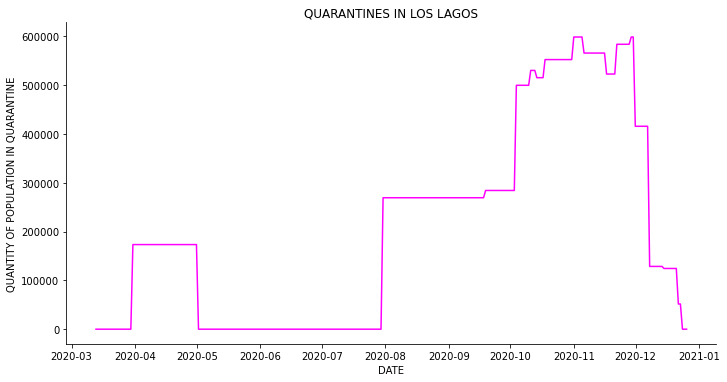

In [199]:
sns.relplot(data = quarantine_R10, x = "DATE", y ='Suma_poblacion', 
            zorder=0, height=5, aspect=2, color="magenta", kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN LOS LAGOS')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Los lagos, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Xl Región: Aysen

In [146]:
Región_de_Aysen = quarantine1[quarantine1['Region'] == 11]
quarantine_R11 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Aysen[(Región_de_Aysen['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Aysen['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R11[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R11

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,572.0
1,2020-03-13 21:00:00,572.0
2,2020-03-14 21:00:00,572.0
3,2020-03-15 21:00:00,572.0
4,2020-03-16 21:00:00,572.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [147]:
quarantine_R11[quarantine_R11.Suma_poblacion == quarantine_R11.Suma_poblacion.max()]

,DATE,Suma_poblacion
198,2020-09-26 21:00:00,61210.0
199,2020-09-27 21:00:00,61210.0
200,2020-09-28 21:00:00,61210.0
201,2020-09-29 21:00:00,61210.0
202,2020-09-30 21:00:00,61210.0
203,2020-10-01 21:00:00,61210.0
204,2020-10-02 21:00:00,61210.0
205,2020-10-03 21:00:00,61210.0
206,2020-10-04 21:00:00,61210.0
207,2020-10-05 21:00:00,61210.0


Text(0.5, 1.0, 'QUARANTINES IN AYSEN')

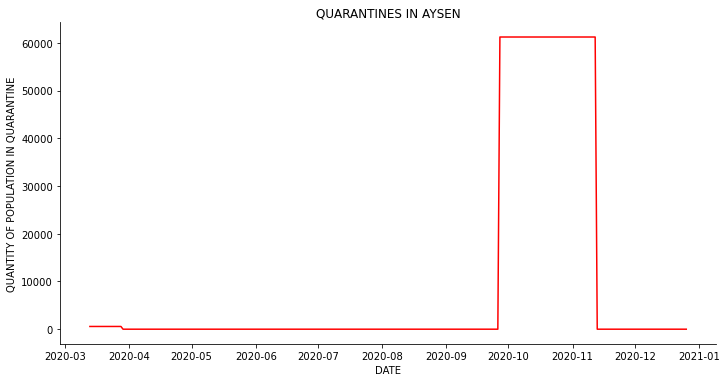

In [187]:
sns.relplot(data = quarantine_R11, x = "DATE", y ='Suma_poblacion', zorder=0,color="red", height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN AYSEN')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Aysen, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Xll Región: Magallanes

In [149]:
Región_de_Magallanes = quarantine1[quarantine1['Region'] == 12]
quarantine_R12 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Magallanes[(Región_de_Magallanes['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Magallanes['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R12[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R12

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,25765.0
285,2020-12-22 21:00:00,25765.0
286,2020-12-23 21:00:00,25765.0
287,2020-12-24 21:00:00,25765.0


In [150]:
quarantine_R12[quarantine_R12.Suma_poblacion == quarantine_R12.Suma_poblacion.max()]

,DATE,Suma_poblacion
184,2020-09-12 21:00:00,173089.0
185,2020-09-13 21:00:00,173089.0
186,2020-09-14 21:00:00,173089.0
187,2020-09-15 21:00:00,173089.0
188,2020-09-16 21:00:00,173089.0
...,...,...
247,2020-11-14 21:00:00,173089.0
248,2020-11-15 21:00:00,173089.0
249,2020-11-16 21:00:00,173089.0
250,2020-11-17 21:00:00,173089.0


Text(0.5, 1.0, 'QUARANTINES IN MAGALLANES')

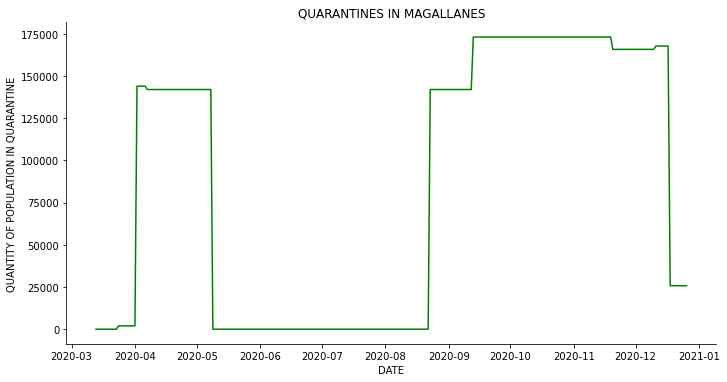

In [182]:
sns.relplot(data = quarantine_R12, x = "DATE", y ='Suma_poblacion', color="green", zorder=0, height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN MAGALLANES')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Magallanes, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### Xlll Región: Metropolitana

In [152]:
Región_Metropolitana = quarantine1[quarantine1['Region'] == 13]
quarantine_R13 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_Metropolitana[(Región_Metropolitana['Comienzo_Cuarentena'] <= d) 
                & (Región_Metropolitana['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R13[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R13

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [153]:
quarantine_R13[quarantine_R13.Suma_poblacion == quarantine_R13.Suma_poblacion.max()]
#Se puede evidenciar que en la región metropolitana es la región con más población en cuarentena 
#desde el 27 de junio, se analizan 7.937.418 millones de personas confinadas

,DATE,Suma_poblacion
107,2020-06-27 21:00:00,7937418.0
108,2020-06-28 21:00:00,7937418.0
109,2020-06-29 21:00:00,7937418.0
110,2020-06-30 21:00:00,7937418.0
111,2020-07-01 21:00:00,7937418.0
112,2020-07-02 21:00:00,7937418.0
113,2020-07-03 21:00:00,7937418.0
114,2020-07-04 21:00:00,7937418.0
115,2020-07-05 21:00:00,7937418.0
116,2020-07-06 21:00:00,7937418.0


Text(0.5, 1.0, 'QUARANTINES IN THE METROPOLITAN REGION')

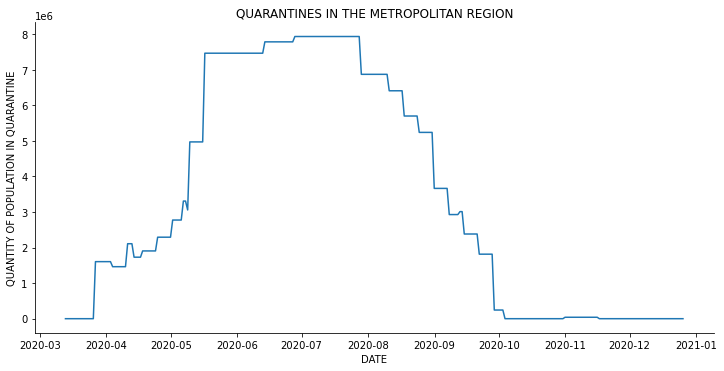

In [154]:
sns.relplot(data = quarantine_R13, x = "DATE", y ='Suma_poblacion', zorder=0, height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN THE METROPOLITAN REGION')
#Se crea un sns relplt para evidenciar de forma gráfica las cuarentenas de Metropolitana, 
#En el eje x las fechas de cuarentenas del 2020 y en el eje y la suma de poblacion

### XlV Región: De los Ríos

In [155]:
Región_de_Los_Rios = quarantine1[quarantine1['Region'] == 14]
quarantine_R14 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Los_Rios[(Región_de_Los_Rios['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Los_Rios['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R14[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R14

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,230497.0
285,2020-12-22 21:00:00,230497.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [156]:
quarantine_R14[quarantine_R14.Suma_poblacion == quarantine_R14.Suma_poblacion.max()]

,DATE,Suma_poblacion
275,2020-12-12 21:00:00,266276.0
276,2020-12-13 21:00:00,266276.0


Text(0.5, 1.0, 'QUARANTINES IN LOS RIOS')

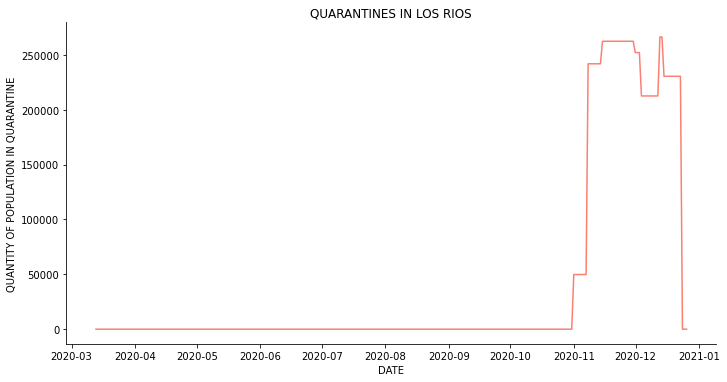

In [200]:
sns.relplot(data = quarantine_R14, x = "DATE", y ='Suma_poblacion', 
            color="salmon", zorder=0, height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN LOS RIOS')

### XV Región: Arica y Parinacota

In [158]:
Región_de_Arica_y_Parinacota = quarantine1[quarantine1['Region'] == 15]
quarantine_R15 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Arica_y_Parinacota[(Región_de_Arica_y_Parinacota['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Arica_y_Parinacota['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R15[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R15

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [159]:
quarantine_R15[quarantine_R15.Suma_poblacion == quarantine_R15.Suma_poblacion.max()]

,DATE,Suma_poblacion
36,2020-04-17 21:00:00,247552.0
37,2020-04-18 21:00:00,247552.0
38,2020-04-19 21:00:00,247552.0
39,2020-04-20 21:00:00,247552.0
40,2020-04-21 21:00:00,247552.0
...,...,...
237,2020-11-04 21:00:00,247552.0
238,2020-11-05 21:00:00,247552.0
239,2020-11-06 21:00:00,247552.0
240,2020-11-07 21:00:00,247552.0


Text(0.5, 1.0, 'QUARANTINES IN ARICA AND PARINACOTA')

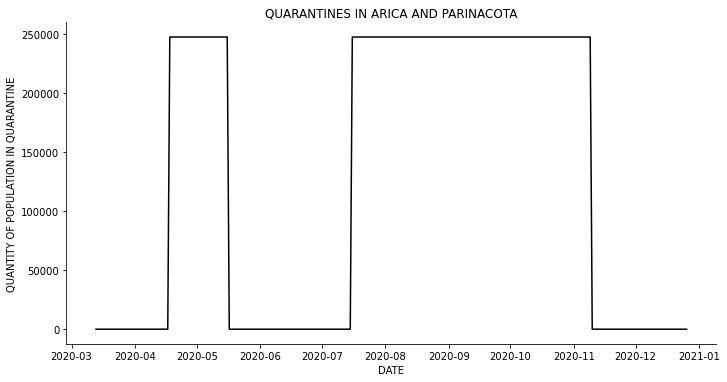

In [184]:
sns.relplot(data = quarantine_R15, x = "DATE", y ='Suma_poblacion',color="black", zorder=0, height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN ARICA AND PARINACOTA')

### XVl Región: Ñuble

In [161]:
Región_de_Ñuble = quarantine1[quarantine1['Region'] == 16]
quarantine_R16 = pd.DataFrame(data=drange, columns=['DATE'])
def Suma_poblacion (d):
    return Región_de_Ñuble[(Región_de_Ñuble['Comienzo_Cuarentena'] <= d) 
                & (Región_de_Ñuble['Fin_Cuarentena'] >= d)][['Poblacion']].sum()

quarantine_R16[['Suma_poblacion']] = quarantines['DATE'].transform(Suma_poblacion)
quarantine_R16

,DATE,Suma_poblacion
0,2020-03-12 21:00:00,0.0
1,2020-03-13 21:00:00,0.0
2,2020-03-14 21:00:00,0.0
3,2020-03-15 21:00:00,0.0
4,2020-03-16 21:00:00,0.0
...,...,...
284,2020-12-21 21:00:00,0.0
285,2020-12-22 21:00:00,0.0
286,2020-12-23 21:00:00,0.0
287,2020-12-24 21:00:00,0.0


In [162]:
quarantine_R16[quarantine_R16.Suma_poblacion == quarantine_R16.Suma_poblacion.max()]

,DATE,Suma_poblacion
18,2020-03-30 21:00:00,232451.0
19,2020-03-31 21:00:00,232451.0
20,2020-04-01 21:00:00,232451.0
21,2020-04-02 21:00:00,232451.0
22,2020-04-03 21:00:00,232451.0
23,2020-04-04 21:00:00,232451.0
24,2020-04-05 21:00:00,232451.0
25,2020-04-06 21:00:00,232451.0
26,2020-04-07 21:00:00,232451.0
27,2020-04-08 21:00:00,232451.0


Text(0.5, 1.0, 'QUARANTINES IN ÑUBLE')

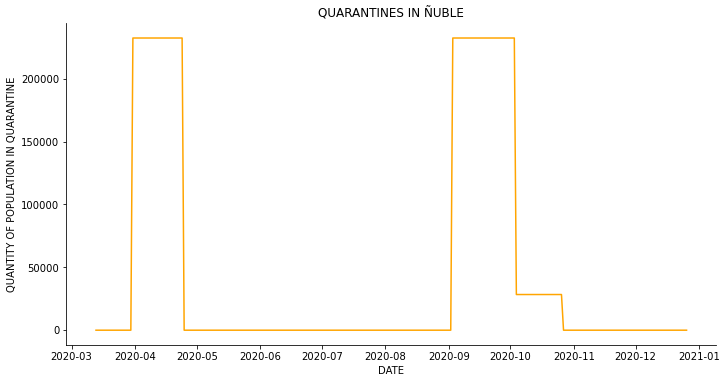

In [185]:
sns.relplot(data = quarantine_R16, x = "DATE", y ='Suma_poblacion',color="orange", zorder=0, height=5, aspect=2, palette= 'dark', kind="line").set_axis_labels('DATE', 'QUANTITY OF POPULATION IN QUARANTINE')
plt.title('QUARANTINES IN ÑUBLE')